In [1]:
import arcpy
from arcpy import sa
from arcpy import ia

In [ ]:
# This will be the location of the geo database
projectDir = "C:/Users/jonat/Documents/ArcGIS/Projects/dLearn_dozerLineExtraction/"

In [ ]:
# base directory for post fire imagery
baseDir = "C:/Users/jonat/Documents/Dataset/DozerLine/DozerLineImagery/postFireImagery_2017/"

In [ ]:
# base directories for each fire
nNunnsDir = baseDir + "Nunns Fire North June 14 2018 1 Foot Imagery/"
sNunnsDir = baseDir + "Nunns Fire South June 14 2018 1 Foot Imagery/"
nTubbsDir = baseDir + "Tubbs Fire North June 14 2018 1 Foot Imagery/"
sTubbsDir = baseDir + "Tubbs Fire South June 14 2018 1 Foot Imagery/"
pocketDir = baseDir + "Pocket Fire June 14 2018 1 Foot Imagery/"

In [ ]:
# Path of raster layer of fire A. Imagery, Mark T 2018 created these tif images
nNunns_inRas = nNunnsDir + "nunns_north_june_14_2018.tif"  # path of north nunns fire imagery
sNunns_inRas = sNunnsDir + "nunns_south_june_14_2018.tif"  # path of south nunns fire imagery
nTubbs_inRas = nTubbsDir + "tubbs_north_june_14_2018.tif"  # path of the north tubbs fire imagery
sTubbs_inRas = sTubbsDir + "tubbs_south_june_14_2018.tif"  # path of the south tubbs fire imagery
pocket_inRas = pocketDir + "pocket_june_14_2018.tif"       # path of the pocket fire imagery

In [ ]:
# Here we will extract the RGB bands from  post 2017 fire A. Imagery dataset
onlyRGB_bands_northNuns  = sa.ExtractBand(nNunns_inRas, [1, 2, 3])
onlyRGB_bands_southNuns  = sa.ExtractBand(sNunns_inRas, [1, 2, 3])
onlyRGB_bands_northTubbs = sa.ExtractBand(nTubbs_inRas, [1, 2, 3])
onlyRGB_bands_southTubbs = sa.ExtractBand(sTubbs_inRas, [1, 2, 3])
onlyRGB_bands_pocket     = sa.ExtractBand(pocket_inRas, [1, 2, 3])

In [ ]:
# Here we will apply the same raster functions to all of the 3 band raster layer
# We will not apply any stretching to the raster, gamma of all channel is set to one
# all other param are set to none
arcpy.env.cellSize = 1

processedNorthNunns = sa.Stretch(raster=onlyRGB_bands_northNuns, stretch_type="None", gamma=[1, 1, 1])
processedSouthNunns = sa.Stretch(raster=onlyRGB_bands_southNuns, stretch_type="None", gamma=[1, 1, 1])
processedNorthTubbs = sa.Stretch(raster=onlyRGB_bands_northTubbs, stretch_type="None", gamma=[1, 1, 1])
processedSouthTubbs = sa.Stretch(raster=onlyRGB_bands_southTubbs, stretch_type="None", gamma=[1, 1, 1])
processedPocket     = sa.Stretch(raster=onlyRGB_bands_pocket, stretch_type="None", gamma=[1, 1, 1])

In [ ]:
#Saving the raster to the geo database,for future work
# enable the overwrite option...
arcpy.env.overwriteOutput = 1

arcpy.env.workspace = projectDir + "/dozerLine_raster"

processedNorthNunns.save("processedNorthNunns.tif")
processedSouthNunns.save("processedSouthNunns.tif")
processedNorthTubbs.save("processedNorthTubbs.tif")
processedSouthTubbs.save("processedSouthTubbs.tif")
processedPocket.save("processedPocket.tif")

In [2]:
# In this section and onward will create image chips that will be used to train, validate,
# and test our deep learning model

# This is the folder that will hold the image chips created
dataSetFolder = "C:/Users/jonat/Documents/Dataset/DozerLine/"

# This is the folder that will hold the image chips created
imageChip_folder = dataSetFolder + "DozerLineImagery/ImagesChips/dozerLine2017ImageChipsPNG"

# location of dozer line location
dozerLine_location = dataSetFolder+"DozerLineLocation/Corrected_2017_Polygonal_Dozerlines.gdb/Canopy_Corrected_Dozerline_Data"
cv_field = "Class_Val"

In [12]:
processedNorthNunns = sa.Raster("C:/Users/jonat/Documents/ArcGIS/Projects/dLearn_dozerLineExtraction/dozerLine_raster/processedNorthNunns.tif")
processedSouthNunns = sa.Raster("C:/Users/jonat/Documents/ArcGIS/Projects/dLearn_dozerLineExtraction/dozerLine_raster/processedSouthNunns.tif")
processedNorthTubbs = sa.Raster("C:/Users/jonat/Documents/ArcGIS/Projects/dLearn_dozerLineExtraction/dozerLine_raster/processedNorthTubbs.tif")
processedSouthTubbs = sa.Raster("C:/Users/jonat/Documents/ArcGIS/Projects/dLearn_dozerLineExtraction/dozerLine_raster/processedSouthTubbs.tif")
processedPocket = sa.Raster("C:/Users/jonat/Documents/ArcGIS/Projects/dLearn_dozerLineExtraction/dozerLine_raster/processedPocket.tif")


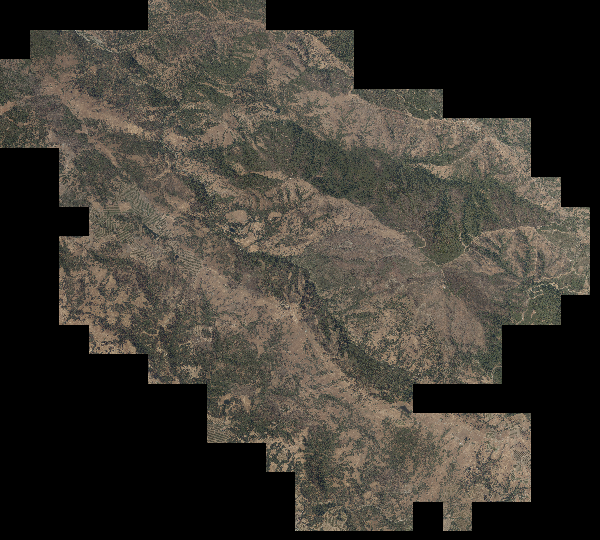

In [13]:
processedPocket

In [16]:
# creating image chips in the north nunns area
arcpy.env.extent = processedNorthNunns
arcpy.env.cellSize = processedNorthNunns
arcpy.env.overwriteOutput = 1

ia.ExportTrainingDataForDeepLearning(
    in_raster = processedNorthNunns,
    out_folder = imageChip_folder,
    in_class_data = dozerLine_location,
    image_chip_format = "PNG",
    tile_size_x = "572",
    tile_size_y = "572",
    stride_x = "572",
    stride_y = "572",
    metadata_format = "Classified_Tiles",
    start_index = 0,
    class_value_field = cv_field,
    rotation_angle = 0
)

<geoprocessing server result object at 0x1b376873fc0>

In [15]:
# creating image chips in the south nunns area in the same folder
# Execute
arcpy.env.extent = processedSouthNunns
arcpy.env.cellSize = processedSouthNunns
arcpy.env.overwriteOutput = 1
ia.ExportTrainingDataForDeepLearning(
    in_raster = processedSouthNunns,
    out_folder = imageChip_folder,
    in_class_data = dozerLine_location,
    image_chip_format = "PNG",
    tile_size_x = "572",
    tile_size_y = "572",
    stride_x = "572",
    stride_y = "572",
    metadata_format = "Classified_Tiles",
    start_index = 0,
    class_value_field = cv_field,
    rotation_angle = 0
)

<geoprocessing server result object at 0x1b36e03d7b0>

In [ ]:
# creating image chips in the North tubbs area in the same folder
# Execute
arcpy.env.extent = processedNorthTubbs
arcpy.env.cellSize = processedNorthTubbs

ia.ExportTrainingDataForDeepLearning(
    in_raster = processedNorthTubbs,
    out_folder = imageChip_folder,
    in_class_data = dozerLine_location,
    image_chip_format = "PNG",
    tile_size_x = "572",
    tile_size_y = "572",
    stride_x = "572",
    stride_y = "572",
    metadata_format = "Classified_Tiles",
    start_index = 0,
    class_value_field = cv_field,
    rotation_angle = 0
)

In [ ]:
# creating image chips in the south tubbs area in the same folder
arcpy.env.extent = processedSouthTubbs
arcpy.env.cellSize = processedSouthTubbs

ia.ExportTrainingDataForDeepLearning(
    in_raster = processedSouthTubbs,
    out_folder = imageChip_folder,
    in_class_data = dozerLine_location,
    image_chip_format = "PNG",
    tile_size_x = "572",
    tile_size_y = "572",
    stride_x = "572",
    stride_y = "572",
    metadata_format = "Classified_Tiles",
    start_index = 0,
    class_value_field = cv_field,
    rotation_angle = 0
)

In [ ]:
# creating image chips in the pocket area in the same folder
# Execute
arcpy.env.extent = processedPocket
arcpy.env.cellSize = processedPocket

ia.ExportTrainingDataForDeepLearning(
    in_raster = processedPocket,
    out_folder = imageChip_folder,
    in_class_data = dozerLine_location,
    image_chip_format = "PNG",
    tile_size_x = "572",
    tile_size_y = "572",
    stride_x = "572",
    stride_y = "572",
    metadata_format = "Classified_Tiles",
    start_index = 0,
    class_value_field = cv_field,
    rotation_angle = 0
)

In [ ]:
# After gone those this process, we will have create a file that will contain all image chips that will be used
# as training, validation, and test images
# In the next note book, we take the resulting folder of images and create our train, validation, and test spits